# ChEMBL

In [2]:
import sys
print("Python version:", sys.version)

Python version: 3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)]


In [3]:
from chembl_webresource_client.new_client import new_client

available_resources = [resource for resource in dir(new_client) if not resource.startswith('_')]
print(available_resources)

['activity', 'activity_supplementary_data_by_activity', 'assay', 'assay_class', 'atc_class', 'binding_site', 'biotherapeutic', 'cell_line', 'chembl_id_lookup', 'compound_record', 'compound_structural_alert', 'description', 'document', 'document_similarity', 'drug', 'drug_indication', 'drug_warning', 'go_slim', 'image', 'mechanism', 'metabolism', 'molecule', 'molecule_form', 'official', 'organism', 'protein_classification', 'similarity', 'source', 'substructure', 'target', 'target_component', 'target_relation', 'tissue', 'xref_source']


In [4]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
mols = molecule.filter(pref_name__iexact='aspirin') # drug - aspirin
mols

[{'atc_classifications': ['B01AC06', 'N02BA01', 'N02BA51', 'A01AD05', 'N02BA71'], 'availability_type': 2, 'biotherapeutic': None, 'black_box_warning': 0, 'chebi_par_id': 15365, 'chemical_probe': 0, 'chirality': 2, 'cross_references': [{'xref_id': 'aspirin', 'xref_name': 'aspirin', 'xref_src': 'DailyMed'}, {'xref_id': '144203627', 'xref_name': 'SID: 144203627', 'xref_src': 'PubChem'}, {'xref_id': '144209315', 'xref_name': 'SID: 144209315', 'xref_src': 'PubChem'}, {'xref_id': '144210466', 'xref_name': 'SID: 144210466', 'xref_src': 'PubChem'}, {'xref_id': '170465039', 'xref_name': 'SID: 170465039', 'xref_src': 'PubChem'}, {'xref_id': '17389202', 'xref_name': 'SID: 17389202', 'xref_src': 'PubChem'}, {'xref_id': '17390036', 'xref_name': 'SID: 17390036', 'xref_src': 'PubChem'}, {'xref_id': '174007205', 'xref_name': 'SID: 174007205', 'xref_src': 'PubChem'}, {'xref_id': '26747283', 'xref_name': 'SID: 26747283', 'xref_src': 'PubChem'}, {'xref_id': '26752858', 'xref_name': 'SID: 26752858', 'xref

In [5]:
#Find a molecule by its synonyms
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
mols = molecule.filter(molecule_synonyms__molecule_synonym__iexact='viagra').only('molecule_chembl_id')
mols

[{'molecule_chembl_id': 'CHEMBL192'}, {'molecule_chembl_id': 'CHEMBL1737'}]

### Get a single molecule by ChEMBL id

In [6]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
m1 = molecule.filter(chembl_id='CHEMBL192').only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])
m1

[{'molecule_chembl_id': 'CHEMBL192', 'molecule_structures': {'canonical_smiles': 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12', 'molfile': '\n     RDKit          2D\n\n 33 36  0  0  0  0  0  0  0  0999 V2000\n    2.1000   -0.0042    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.1000    0.7000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.5375   -0.0042    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4917   -0.3667    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8792   -0.0042    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8042    0.9083    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4917    1.0625    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8792    0.6833    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    3.2042    0.3458    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8042   -0.2417    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2875   -0.3750    0.0000 C   0  0  0  0  0  0  0  0  0  

### Get many molecules by id¶

In [7]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
mols = molecule.filter(molecule_chembl_id__in=['CHEMBL25', 'CHEMBL192', 'CHEMBL27']).only(['molecule_chembl_id', 'pref_name'])
mols

[{'molecule_chembl_id': 'CHEMBL25', 'pref_name': 'ASPIRIN'}, {'molecule_chembl_id': 'CHEMBL27', 'pref_name': 'PROPRANOLOL'}, {'molecule_chembl_id': 'CHEMBL192', 'pref_name': 'SILDENAFIL'}]

### Display a molecule image

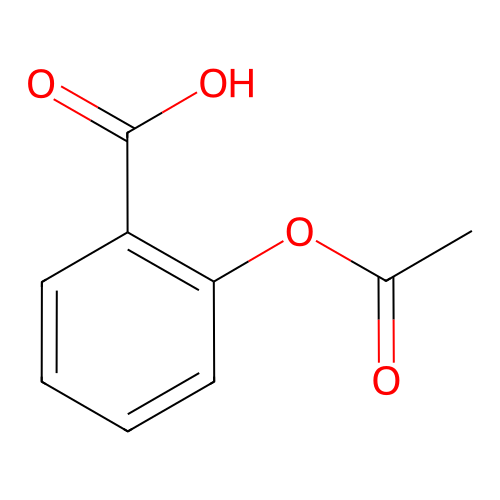

In [8]:
from chembl_webresource_client.new_client import new_client
from IPython.display import SVG

image = new_client.image
image.set_format('svg')
SVG(image.get('CHEMBL25'))

### Get a single molecule by standard inchi key

In [9]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
mol = molecule.filter(molecule_structures__standard_inchi_key='BSYNRYMUTXBXSQ-UHFFFAOYSA-N').only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])
mol

[{'molecule_chembl_id': 'CHEMBL25', 'molecule_structures': {'canonical_smiles': 'CC(=O)Oc1ccccc1C(=O)O', 'molfile': '\n     RDKit          2D\n\n 13 13  0  0  0  0  0  0  0  0999 V2000\n   19.8052   -4.2758    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   19.8040   -5.0953    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   20.5121   -5.5043    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   21.2217   -5.0948    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   21.2189   -4.2722    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   20.5103   -3.8669    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   20.5078   -3.0497    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   21.2143   -2.6390    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   19.7989   -2.6432    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   21.9250   -3.8609    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   22.6343   -4.2668    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   23.3405   -3.8556    0.0000 C 

### Find compounds similar to given SMILES query with similarity threshold of 70%

In [10]:
from chembl_webresource_client.new_client import new_client

similarity = new_client.similarity
res = similarity.filter(smiles="CO[C@@H](CCC#C\C=C/CCCC(C)CCCCC=C)C(=O)[O-]", similarity=70).only(['molecule_chembl_id', 'similarity'])
for i in res:
    print(i)

{'molecule_chembl_id': 'CHEMBL478779', 'similarity': '85.4166686534881591796875'}
{'molecule_chembl_id': 'CHEMBL477889', 'similarity': '85.4166686534881591796875'}
{'molecule_chembl_id': 'CHEMBL477888', 'similarity': '85.4166686534881591796875'}
{'molecule_chembl_id': 'CHEMBL2304268', 'similarity': '70.1754391193389892578125'}


### Find compounds similar to aspirin (CHEMBL25) with similarity threshold of 70%

In [11]:
from chembl_webresource_client.new_client import new_client

similarity = new_client.similarity
res = similarity.filter(chembl_id='CHEMBL25', similarity=70).only(['molecule_chembl_id', 'pref_name', 'similarity'])
res

[{'molecule_chembl_id': 'CHEMBL2296002', 'pref_name': None, 'similarity': '100'}, {'molecule_chembl_id': 'CHEMBL1697753', 'pref_name': 'ASPIRIN DL-LYSINE', 'similarity': '100'}, {'molecule_chembl_id': 'CHEMBL3833404', 'pref_name': 'CARBASPIRIN', 'similarity': '88.8888895511627197265625'}, {'molecule_chembl_id': 'CHEMBL3833325', 'pref_name': 'CARBASPIRIN CALCIUM', 'similarity': '88.8888895511627197265625'}, '...(remaining elements truncated)...']

### Find compounds with the same connectivity

In [12]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
res = molecule.filter(molecule_structures__canonical_smiles__connectivity='CN(C)C(=N)N=C(N)N').only(['molecule_chembl_id', 'pref_name'])
for i in res:
    print(i)

{'molecule_chembl_id': 'CHEMBL1431', 'pref_name': 'METFORMIN'}
{'molecule_chembl_id': 'CHEMBL1703', 'pref_name': 'METFORMIN HYDROCHLORIDE'}
{'molecule_chembl_id': 'CHEMBL3094198', 'pref_name': None}


### Get all approved drugs

using `order_by` to sort them by molecular weight

In [13]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
approved_drugs = molecule.filter(max_phase=4).order_by('molecule_properties__mw_freebase')
approved_drugs
# 4th phase of clinical trials

[{'atc_classifications': ['V03AN03'], 'availability_type': 1, 'biotherapeutic': None, 'black_box_warning': 0, 'chebi_par_id': 30217, 'chemical_probe': 0, 'chirality': 2, 'cross_references': [], 'dosed_ingredient': True, 'first_approval': 2015, 'first_in_class': 0, 'helm_notation': None, 'indication_class': 'Gases, Diluent for', 'inorganic_flag': 1, 'max_phase': '4.0', 'molecule_chembl_id': 'CHEMBL1796997', 'molecule_hierarchy': {'active_chembl_id': 'CHEMBL1796997', 'molecule_chembl_id': 'CHEMBL1796997', 'parent_chembl_id': 'CHEMBL1796997'}, 'molecule_properties': {'alogp': None, 'aromatic_rings': None, 'cx_logd': None, 'cx_logp': None, 'cx_most_apka': None, 'cx_most_bpka': None, 'full_molformula': 'He', 'full_mwt': '4.00', 'hba': None, 'hba_lipinski': None, 'hbd': None, 'hbd_lipinski': None, 'heavy_atoms': None, 'molecular_species': None, 'mw_freebase': '4.00', 'mw_monoisotopic': '4.0026', 'np_likeness_score': None, 'num_lipinski_ro5_violations': None, 'num_ro5_violations': None, 'psa'

### Get approved drugs for lung cancer

In [14]:
from chembl_webresource_client.new_client import new_client

drug_indication = new_client.drug_indication
molecules = new_client.molecule

lung_cancer_ind = drug_indication.filter(efo_term__icontains="LUNG CARCINOMA")
lung_cancer_mols = molecules.filter(
    molecule_chembl_id__in=[x['molecule_chembl_id'] for x in lung_cancer_ind])

len(lung_cancer_mols)

716

### Filter drugs by approval year and name

In [15]:
from chembl_webresource_client.new_client import new_client

drug = new_client.drug
res = drug.filter(first_approval__gte=1980).filter(usan_stem="-azosin")
res
# year = 1980
# name = 'azosin'

[{'applicants': ['Abbott Laboratories Pharmaceutical Products Div', 'Heritage Pharma Labs Inc Dba Avet Pharmaceuticals Labs Inc', 'Ivax Pharmaceuticals Inc Sub Teva Pharmaceuticals Usa', 'Beximco Pharmaceuticals Usa Inc', 'Mylan Technologies Inc', 'Teva Pharmaceuticals Usa Inc', 'Jubilant Cadista Pharmaceuticals Inc', 'Apnar Pharma Lp', 'Ranbaxy Laboratories Ltd', 'Sandoz Inc'], 'atc_classification': [{'code': 'G04CA03', 'description': 'GENITO URINARY SYSTEM AND SEX HORMONES: UROLOGICALS: DRUGS USED IN BENIGN PROSTATIC HYPERTROPHY: Alpha-adrenoreceptor antagonists'}], 'availability_type': 1, 'biotherapeutic': None, 'black_box': 0, 'black_box_warning': '0', 'chirality': 0, 'development_phase': '4.0', 'drug_type': 1, 'first_approval': 1987, 'first_in_class': 0, 'helm_notation': None, 'indication_class': 'Antihypertensive', 'molecule_chembl_id': 'CHEMBL611', 'molecule_properties': {'alogp': '1.06', 'aromatic_rings': 2, 'cx_logd': '0.95', 'cx_logp': '1.18', 'cx_most_apka': None, 'cx_most_b

### Get all biotherapeutic molecules

In [16]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
biotherapeutics = molecule.filter(biotherapeutic__isnull=False)
len(biotherapeutics)

23047

### Get molecules with molecular weight <= 300

In [17]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
light_molecules = molecule.filter(molecule_properties__mw_freebase__lte=300)

len(light_molecules)

423016

#### Get molecules with molecular weight <= 300 AND pref_name ending with nib

In [18]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
light_nib_molecules = molecule.filter(molecule_properties__mw_freebase__lte=300, pref_name__iendswith="nib").only(['molecule_chembl_id', 'pref_name'])

light_nib_molecules

[{'molecule_chembl_id': 'CHEMBL276711', 'pref_name': 'SEMAXANIB'}, {'molecule_chembl_id': 'CHEMBL4594348', 'pref_name': 'ELSUBRUTINIB'}]

### Get all molecules in ChEMBL with no Rule-of-Five violations

In [19]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
no_violations = molecule.filter(molecule_properties__num_ro5_violations=0)
len(no_violations)

1655867

## Activities

### Get all IC50 activities related to the hERG target

In [20]:
from chembl_webresource_client.new_client import new_client

target = new_client.target
activity = new_client.activity
herg = target.filter(pref_name__iexact='hERG').only('target_chembl_id')[0]
herg_activities = activity.filter(target_chembl_id=herg['target_chembl_id']).filter(standard_type="IC50")

len(herg_activities)

15255

## Targets

### Find a target by gene name

In [21]:
from chembl_webresource_client.new_client import new_client

target = new_client.target
gene_name = 'BRD4'
res = target.filter(target_synonym__icontains=gene_name).only(['organism', 'pref_name', 'target_type'])
for i in res:
    print(i)

{'organism': 'Homo sapiens', 'pref_name': 'Bromodomain-containing protein 4', 'target_type': 'SINGLE PROTEIN'}
{'organism': 'Mus musculus', 'pref_name': 'Bromodomain-containing protein 4', 'target_type': 'SINGLE PROTEIN'}
{'organism': 'Homo sapiens', 'pref_name': 'BRD4/HDAC1', 'target_type': 'PROTEIN COMPLEX'}
{'organism': 'Homo sapiens', 'pref_name': 'Cereblon/Cullin-4A/Bromodomain-containing protein 4', 'target_type': 'PROTEIN-PROTEIN INTERACTION'}
{'organism': 'Homo sapiens', 'pref_name': 'Cereblon/Bromodomain-containing protein 4', 'target_type': 'PROTEIN-PROTEIN INTERACTION'}
{'organism': 'Homo sapiens', 'pref_name': 'von Hippel-Lindau disease tumor suppressor/Bromodomain-containing protein 4', 'target_type': 'PROTEIN-PROTEIN INTERACTION'}
{'organism': 'Homo sapiens', 'pref_name': 'Cereblon/DNA damage-binding protein 1/Bromodomain-containing protein 4', 'target_type': 'PROTEIN-PROTEIN INTERACTION'}
{'organism': 'Homo sapiens', 'pref_name': 'von Hippel-Lindau disease tumor suppress

## References

### Find all PubMed IDs from a list that exist in the ChEMBL database

In [23]:
from chembl_webresource_client.new_client import new_client
ids = (27502541, 27584694, 27977190, 81377812)
pubmed_IDs = new_client.document
pm = pubmed_IDs.filter(pubmed_id__in=ids).only('pubmed_id')
pm

# PubMed IDs: 27502541, 27584694, 27977190, 81377812

[{'pubmed_id': 27502541}, {'pubmed_id': 27584694}, {'pubmed_id': 27977190}]

## Compute various molecular descriptors

In [24]:
from chembl_webresource_client.utils import utils
import json

aspirin = utils.smiles2ctab('O=C(Oc1ccccc1C(=O)O)C')
descs = json.loads(utils.chemblDescriptors(aspirin))[0]
descs
# SMILES of aspirin = 'O=C(Oc1ccccc1C(=O)O)C'

{'qed': 0.5501217966938848,
 'MolWt': 180.15899999999996,
 'TPSA': 63.60000000000001,
 'HeavyAtomCount': 13,
 'NumAromaticRings': 1,
 'NumHAcceptors': 3,
 'NumHDonors': 1,
 'NumRotatableBonds': 2,
 'MolLogP': 1.3100999999999998,
 'MolecularFormula': 'C9H8O4',
 'Ro3Pass': 0,
 'NumRo5': 0,
 'MonoisotopicMolWt': 180.042258736}